# Communities within Wirtschaft Topic of derStandard

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
from utils import *

In [2]:
%load_ext autoreload
%autoreload 2

## Load Data, filter and build graph

In [3]:
df = load_data()
df['ArticleChannel'].value_counts()

ArticleChannel
Inland           188069
Panorama          98391
Meinung           96008
Web               59589
International     55911
Wirtschaft        50755
Sport             40396
Etat              34890
Kultur            24013
User              12760
Wissenschaft      12565
Lifestyle         11124
Gesundheit        10490
Bildung            7942
dieStandard        7527
AutoMobil          6366
Immobilien         5071
Diverses           4597
Zukunft            4228
Reisen             3285
Familie            2658
Karriere           2459
Name: count, dtype: int64

In [4]:
# select categories to analyze
channels = ['Wirtschaft']

filtered_df, articles_per_user, selected_users = filter_users(df, channels, min_articles=4, max_num_users=2000)
print(f"Number of selected users: {len(selected_users)}")

Number of selected users: 1478


In [5]:
# create graph
weights = iom(selected_users, articles_per_user)
threshold = np.percentile(weights.flatten(), 75)
print(f"Threshold: {threshold}")
graph = build_graph(selected_users, weights, threshold)

  0%|          | 0/1478 [00:00<?, ?it/s]

100%|██████████| 1478/1478 [00:05<00:00, 278.79it/s]


Threshold: 0.0


## Greedy Modularity

In [7]:
communities = nx.community.modularity_max.greedy_modularity_communities(graph, 'weight')
print(f"Number of communities: {len(communities)}")
print(f" Sizes of the communities: {[len(c) for c in communities]}")

Number of communities: 3
 Sizes of the communities: [808, 577, 93]


In [8]:
filtered_df['ArticleRessortName'].value_counts()

ArticleRessortName
Wirtschaftspolitik                                    9151
Unternehmen                                           6982
Umwelt, Landwirtschaft & Klima                        3603
alles gut? Weltverbessern für Anfänger                1292
Einkommen                                             1177
Energiemarkt                                          1130
Welthandel                                            1001
Tourismus                                              826
Arbeitsmarkt                                           754
Finanzen & Börse                                       641
Steuern                                                638
Automobil                                              476
Handel                                                 452
Bahn                                                   402
Geld                                                   383
Verkehr & Kosten                                       345
Wo Migration beginnt                 

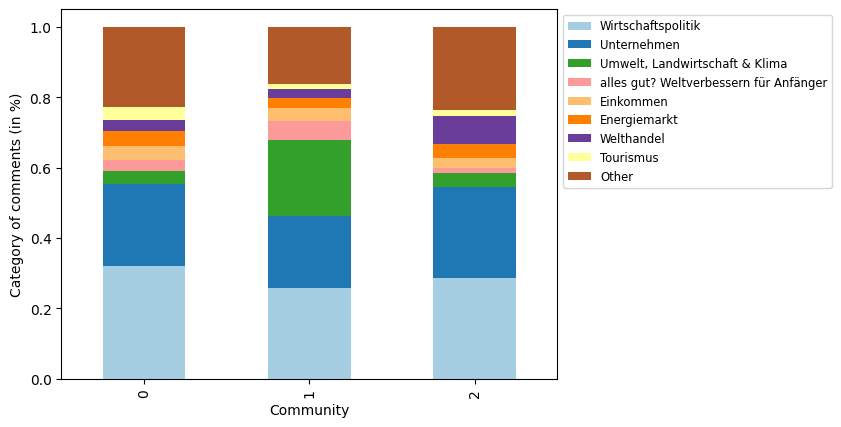

In [9]:
plot_subtopics_per_community(communities, filtered_df, 8)

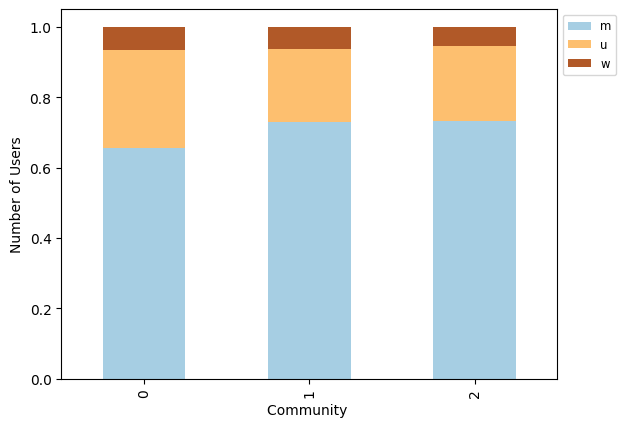

In [10]:
plot_gender_per_community(communities, filtered_df)

## Louvain Community

In [11]:
communities = nx.community.louvain_communities(graph, weight='weight')
communities = list(communities)
print(f"Number of communities: {len(communities)}")
print(f"Sizes of the communities: {[len(c) for c in communities]}")

Number of communities: 6
Sizes of the communities: [208, 160, 129, 285, 290, 406]


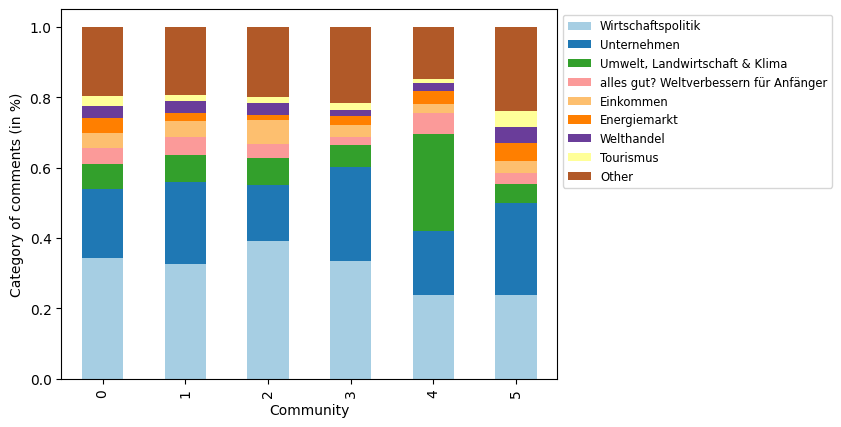

In [12]:
plot_subtopics_per_community(communities, filtered_df, 8)

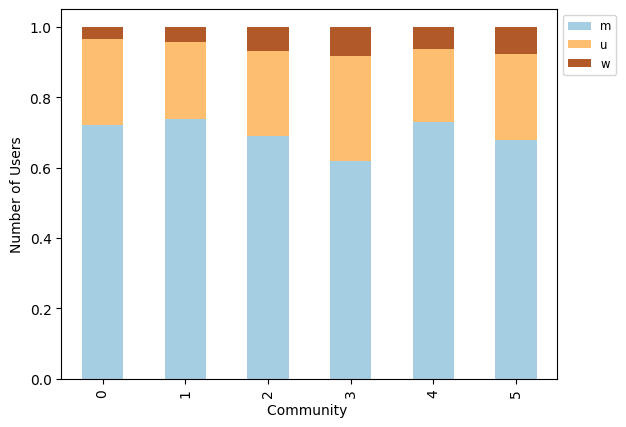

In [13]:
plot_gender_per_community(communities, filtered_df)